### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [4]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [5]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

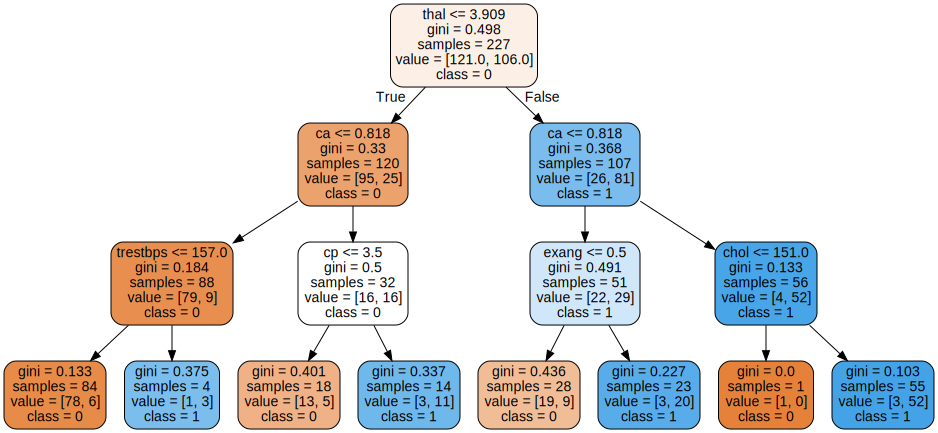

In [6]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [7]:
clf = DecisionTreeClassifier()

In [8]:
from sklearn.metrics import classification_report

bagged_trees = BaggingClassifier(
    estimator=clf, n_estimators=100, max_samples=0.8
    )
bagged_trees.fit(X_train, y_train)
print(classification_report(y_test, bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        43
           1       0.76      0.79      0.78        33

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [9]:
forest = RandomForestClassifier(n_estimators=200, max_depth=6)
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        43
           1       0.78      0.85      0.81        33

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [10]:
# 1. Decision Tree: pipeline + grid search (at least 3 hyperparameters)
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

dt_params = {
    'clf__max_depth': [3, 6, 9, 12],
    'clf__min_samples_split': [2, 5, 10],
    'clf__criterion': ['gini', 'entropy']
}
dt_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])
dt_grid = GridSearchCV(dt_pipe, dt_params, scoring='f1_macro', cv=5)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
dt_pred = dt_best.predict(X_test)
dt_f1 = f1_score(y_test, dt_pred, average='macro')
dt_acc = accuracy_score(y_test, dt_pred)

In [11]:
# 2. Bagged Decision Trees: pipeline + grid search (at least 3 hyperparameters)
bag_params = {
    'bag__n_estimators': [50, 100, 200],
    'bag__max_samples': [0.5, 0.8, 1.0],
    'bag__estimator__max_depth': [3, 6, 9]
}
bag_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('bag', BaggingClassifier(estimator=DecisionTreeClassifier()))
])
bag_grid = GridSearchCV(bag_pipe, bag_params, scoring='f1_macro', cv=5)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_
bag_pred = bag_best.predict(X_test)
bag_f1 = f1_score(y_test, bag_pred, average='macro')
bag_acc = accuracy_score(y_test, bag_pred)

In [12]:
# 3. Random Forest: pipeline + grid search (at least 3 hyperparameters)
rf_params = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [6, 9, 12],
    'rf__max_features': ['sqrt', 'log2']
}
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
rf_grid = GridSearchCV(rf_pipe, rf_params, scoring='f1_macro', cv=5)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_f1 = f1_score(y_test, rf_pred, average='macro')
rf_acc = accuracy_score(y_test, rf_pred)

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Bagged Trees', 'Random Forest'],
    'F1_macro': [dt_f1, bag_f1, rf_f1],
    'Accuracy': [dt_acc, bag_acc, rf_acc]
})
results

,Model,F1_macro,Accuracy
0,Decision Tree,0.823792,0.828947
1,Bagged Trees,0.826514,0.828947
2,Random Forest,0.866103,0.868421


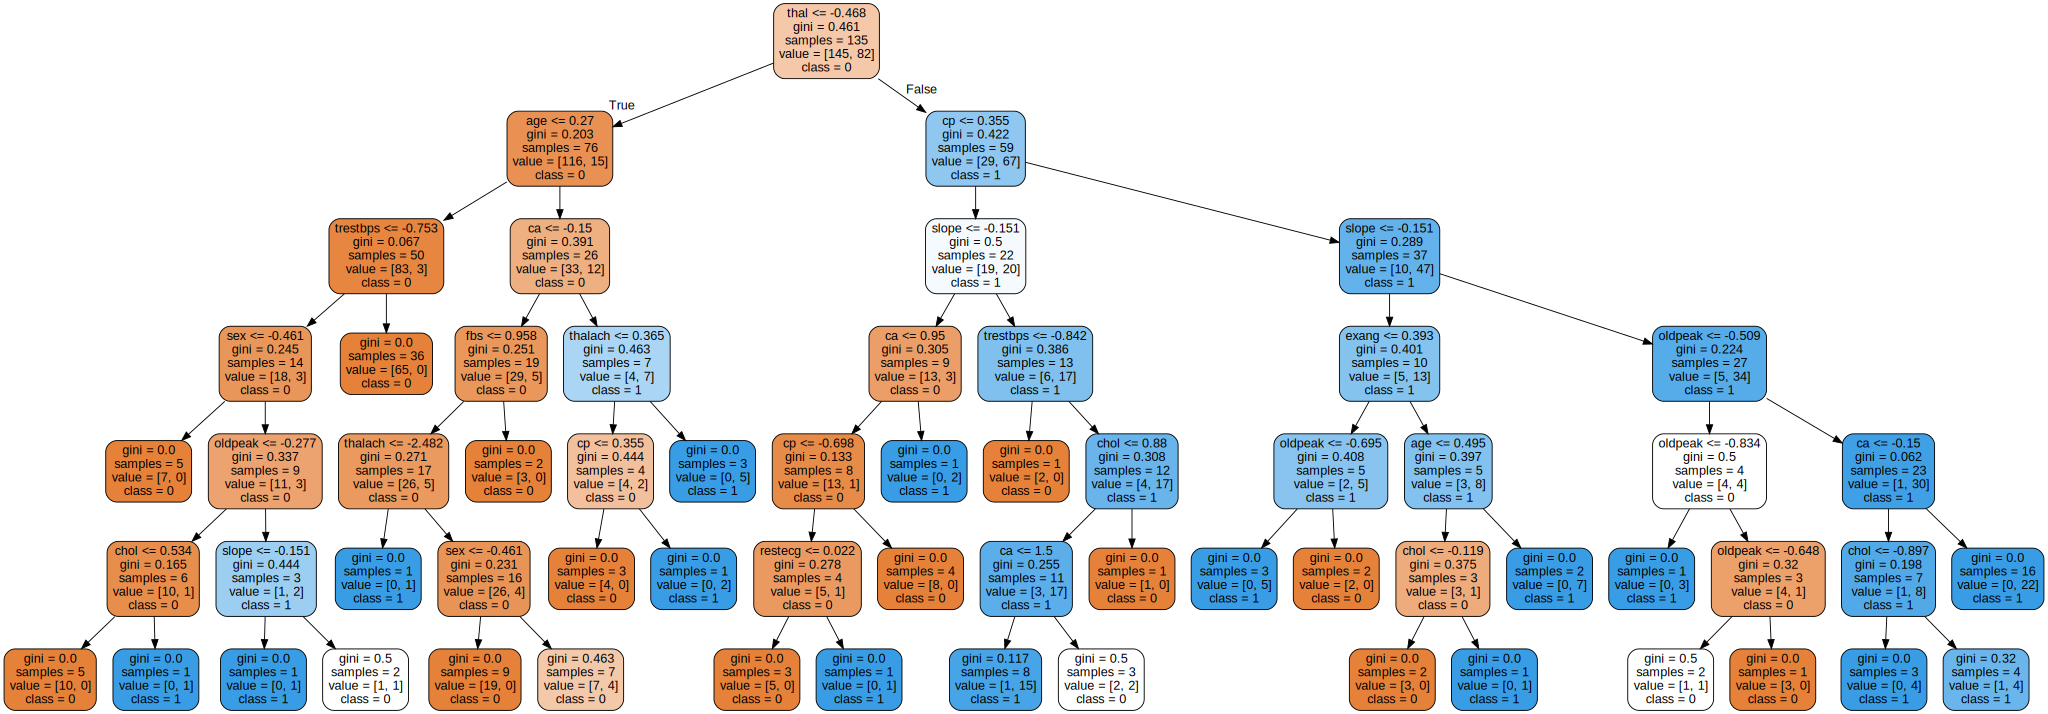

In [13]:
best_idx = results['F1_macro'].idxmax()
best_model_name = results.loc[best_idx, 'Model']

if best_model_name == 'Decision Tree':
    plot_data = export_graphviz(dt_best.named_steps['clf'],
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=data.columns[:-1],
                                class_names=['0', '1'])
    graph = graphviz.Source(plot_data)
    display(graph)
elif best_model_name == 'Bagged Trees':
    plot_data = export_graphviz(bag_best.named_steps['bag'].estimator_,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=data.columns[:-1],
                                class_names=['0', '1'])
    graph = graphviz.Source(plot_data)
    display(graph)
elif best_model_name == 'Random Forest':
    plot_data = export_graphviz(rf_best.named_steps['rf'].estimators_[0],
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=data.columns[:-1],
                                class_names=['0', '1'])
    graph = graphviz.Source(plot_data)
    display(graph)

In [19]:
dt_grid.best_params_

{'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_split': 2}

In [20]:
bag_grid.best_params_

{'bag__estimator__max_depth': 6,
 'bag__max_samples': 1.0,
 'bag__n_estimators': 50}

In [17]:
rf_grid.best_params_

{'rf__max_depth': 6, 'rf__max_features': 'log2', 'rf__n_estimators': 100}

### สรุปการเลือก Model และ Hyperparameter
ผลลัพธ์มีดังนี้:

- **Model ที่ดีที่สุด:** Random Forest
- **การพล็อต tree ที่ดีที่สุด:** ดูได้จากโค้ดนี้ `display(graph)`

#### Hyperparameter ที่เลือก
- **Decision Tree:**
    - ความลึกสูงสุดของ tree
    - จำนวนตัวอย่างขั้นต่ำที่จำเป็นในการแยกโหนด
    - เกณฑ์ในการวัดคุณภาพของการแยก (Gini impurity หรือ entropy)

- **Bagged Decision Trees:**
    - เลือกพิจารณาจำนวน tree ที่ใช้ในการรวมกลุ่ม
    - สัดส่วนของข้อมูลที่ใช้ในการฝึกแต่ละ tree
    - ความลึกสูงสุดของแต่ละ tree ย่อย

- **Random Forest:**
    - พิจารณาจำนวน tree ใน forest
    - ความลึกสูงสุดของแต่ละ tree
    - จำนวนของคุณสมบัติที่จะพิจารณาเมื่อมองหาการแยกที่ดีที่สุด

#### ค่า Hyperparameter ที่ดีที่สุด
  - **Decision Tree:** `{'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_split': 2}`
  - **Bagged Decision Trees:** `{'bag__estimator__max_depth': 6, 'bag__max_samples': 1.0, 'bag__n_estimators': 50}`
  - **Random Forest:** `{'rf__max_depth': 6, 'rf__max_features': 'log2', 'rf__n_estimators': 100}`